In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
np.random.seed(0)

In [3]:
def Data(pinit_val,qinit_val):
    def hamilton(t,r):
        p, q =r 
        #H = p**2 + q**2 # spring hamiltonian (linear oscillator)
        pdot= -2*q  
        qdot=2*p
        return pdot,qdot
    
    ll=108
    sol=integrate.solve_ivp(hamilton,(0,18),(pinit_val,qinit_val),t_eval=np.linspace(0,18,ll))
    p = sol.y[0] + (np.random.uniform(0,0.6,ll))
    q = sol.y[1] + (np.random.uniform(0,0.6,ll))
    pdot,qdot = -2*q,2*p
    return np.array([p,q,pdot,qdot])

    

In [4]:
full_p,full_q,full_pdot,full_qdot=Data(1,1)

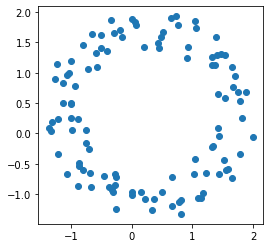

In [5]:
plt.plot(full_p,full_q,'o')
plt.axis('scaled');

In [6]:
train_p,test_p=np.split(full_p,[86])
train_q,test_q=np.split(full_q,[86])
train_pdot,test_pdot=np.split(full_pdot,[86])
train_qdot,test_qdot=np.split(full_qdot,[86])

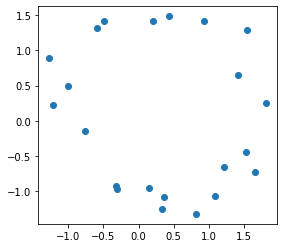

In [7]:
plt.plot(test_p,test_q,'o')
plt.axis('scaled');

In [8]:
train_list=np.array([[train_p,train_q],[train_pdot,train_qdot]])
test_list=np.array([[test_p,test_q],[test_pdot,test_qdot]])

In [9]:
# tfp= tf.constant(x)
# tfq= tf.constant(y)
# with tf.GradientTape() as g:
#     g.watch([tfp,tfq])
#     H= tfp**2+ tfq**2
#     dH_dp,dH_dq = g.gradient(H, [tfp,tfq])
#     print(dH_dp,'\n',dH_dq)

In [10]:
#def loss():
    
    

In [ ]:
def HNN():

In [11]:
myModel=keras.models.Sequential()
myModel.add(keras.layers.Flatten(input_shape=[2]))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(200, activation="tanh"))
myModel.add(keras.layers.Dense(2, activation="softmax"))

In [12]:
myModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 2)                 0         
_________________________________________________________________
dense (Dense)                (None, 200)               600       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 402       
Total params: 41,202
Trainable params: 41,202
Non-trainable params: 0
_________________________________________________________________


In [13]:
#tf.keras.losses.mean_absolute_error
myModel.compile(loss="mean_absolute_error",
                optimizer="Adam",
                metrics=["accuracy"])

In [15]:
x_train=np.transpose(train_list[1])
y_train=np.transpose(train_list[0])

In [16]:
trainedModel=myModel.fit(x_train,y_train, epochs=20)
                        #,validation_data=(X_valid, y_valid))

Epoch 1/20
3/3 [==============================] - 0s 1ms/step - loss: 0.8420 - accuracy: 0.7674
Epoch 2/20
3/3 [==============================] - 0s 921us/step - loss: 0.7523 - accuracy: 0.9302
Epoch 3/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 1.0000
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7451 - accuracy: 0.9884
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7450 - accuracy: 0.9884
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7449 - accuracy: 0.9884
Epoch 7/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7449 - accuracy: 0.9884
Epoch 8/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7448 - accuracy: 0.9884
Epoch 9/20
3/3 [==============================] - 0s 3ms/step - loss: 0.7448 - accuracy: 0.9884
Epoch 10/20
3/3 [==============================] - 0s 2ms/step - loss: 0.7448 - accuracy: 0.9884
Epoch 11/20
3/3 [====================

<AxesSubplot:>

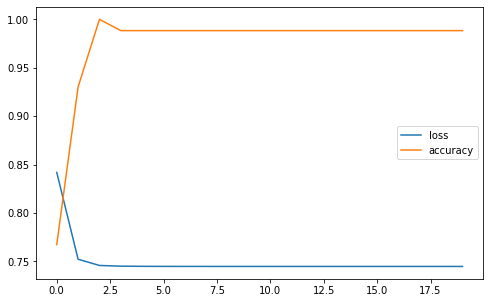

In [17]:
import pandas as pd
pd.DataFrame(trainedModel.history).plot(figsize=(8, 5))


In [18]:
x_test=np.transpose(test_list[1])
y_test=np.transpose(test_list[0])

In [19]:
myModel.evaluate(x_test, y_test)

1/1 [==============================] - 0s 670us/step - loss: 0.7125 - accuracy: 1.0000


[0.712455689907074, 1.0]